<a href="https://colab.research.google.com/github/mohitrajparit/dsML/blob/main/DL02_faceRecogintion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading the dataset

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
# print(os.listdir('/content/drive/MyDrive/yalefaces'))
path='/content/drive/MyDrive/yalefaces'
print(os.listdir(path))


['.DS_Store', 'train', 'test']


##Preprocessing the images

In [ ]:
def get_image_data():
  paths=[os.path.join(path+'/train',f) for f in os.listdir(path+'/train')]
  # print(paths)
  faces=[]
  ids=[]
  for pathh in paths:
    image=Image.open(pathh).convert('L')
    # cv2_imshow(np.array(img))
    image_np=np.array(image,'uint8')
    id=int(os.path.split(pathh)[1].split('.')[0].replace('subject',''))
    faces.append(image_np)
    ids.append(id)
  ids=np.array(ids)
  return ids,faces


In [ ]:
ids,faces=get_image_data()

In [ ]:
print(type(ids),type(faces))
print(len(ids),len(faces))

<class 'numpy.ndarray'> <class 'list'>
135 135


In [ ]:
ids

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        5,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15,  4])

In [ ]:
faces

[array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 252, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 216, 224, 244],
        [255, 255, 255, ..., 215, 220, 245],
        [255, 255, 255, ..., 231, 211, 231],
        ...,
        [255, 255, 255, ..., 192, 197, 203],
        [255, 255, 255, ..., 189, 207, 215],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [ ]:
faces[0],faces[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 252, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

In [ ]:
# threshold: 1.7976931348623157e+308
# radius: 1
# neighbors: 8
# grid_x: 8
# grid_y: 8

lbph_classifier=cv.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces,ids)
lbph_classifier.write('lbph_classifier.yml')

In [ ]:
test_image='/content/drive/MyDrive/yalefaces/test/subject10.sad.gif'


In [ ]:
lbph_face_classifier=cv.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
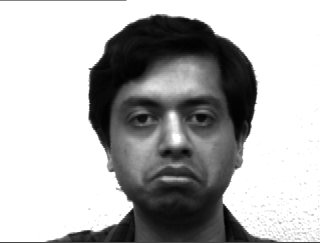

In [ ]:
image=Image.open(test_image).convert('L')
image_np=np.array(image,'uint8')
image_np

In [ ]:
image_np.shape

(243, 320)

In [ ]:
prediction=lbph_face_classifier.predict(image_np)
prediction

(10, 6.384336446373091)

In [ ]:
prediction[0]

10

In [ ]:
expected_output=int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))
expected_output


10

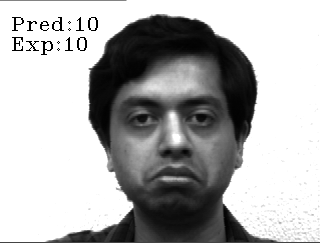

In [ ]:
cv.putText(image_np,'Pred:'+str(prediction[0]),(10,30),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv.putText(image_np,'Exp:'+str(expected_output),(10,50),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2_imshow(image_np)

##Evaluating thr face Classifier


In [ ]:
paths=[os.path.join(path+'/train',f)for f in os.listdir(path+'/train')]
# print(paths)
predictions=[]
expected_outputs=[]
for pathh in paths:
  image=Image.open(pathh).convert('L')
  image_np=np.array(image,'uint8')


['/content/drive/MyDrive/yalefaces/train/subject01.glasses.gif', '/content/drive/MyDrive/yalefaces/train/subject01.leftlight.gif', '/content/drive/MyDrive/yalefaces/train/subject01.noglasses.gif', '/content/drive/MyDrive/yalefaces/train/subject01.normal.gif', '/content/drive/MyDrive/yalefaces/train/subject01.rightlight.gif', '/content/drive/MyDrive/yalefaces/train/subject01.sad.gif', '/content/drive/MyDrive/yalefaces/train/subject01.sleepy.gif', '/content/drive/MyDrive/yalefaces/train/subject01.surprised.gif', '/content/drive/MyDrive/yalefaces/train/subject01.wink.gif', '/content/drive/MyDrive/yalefaces/train/subject02.glasses.gif', '/content/drive/MyDrive/yalefaces/train/subject02.happy.gif', '/content/drive/MyDrive/yalefaces/train/subject02.noglasses.gif', '/content/drive/MyDrive/yalefaces/train/subject02.normal.gif', '/content/drive/MyDrive/yalefaces/train/subject02.rightlight.gif', '/content/drive/MyDrive/yalefaces/train/subject02.sleepy.gif', '/content/drive/MyDrive/yalefaces/trai